In [1]:
import torch
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
x=torch.linspace(-5,5,200)
y=torch.linspace(-5,5,200)
X,Y=torch.meshgrid(x,y,indexing='ij')

In [3]:
# Unimodal functions
Z1 = X**2 + Y**2  # Sphere

# Multimodalfunctions
Z2 = 20 + (X**2 - 10*torch.cos(2*torch.pi*X)) + (Y**2 - 10*torch.cos(2*torch.pi*Y))  # Rastrigin

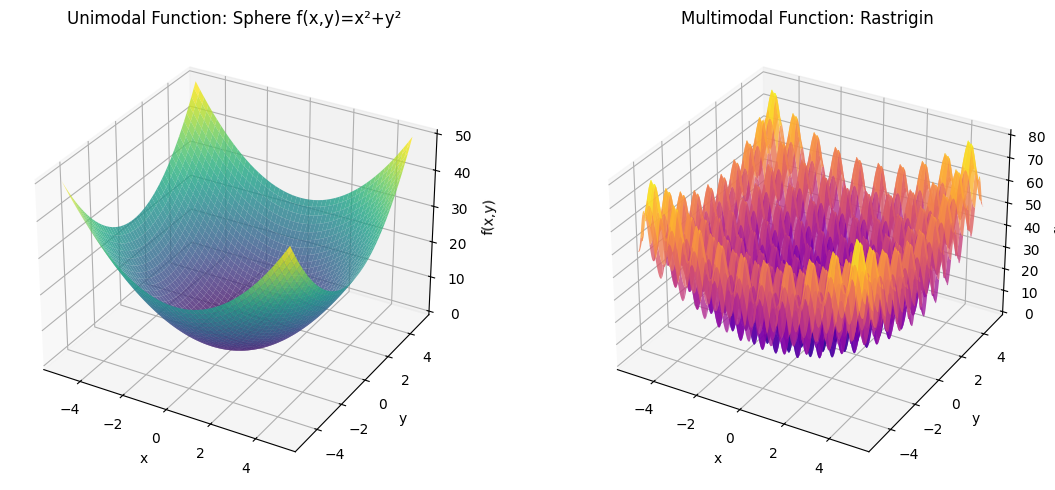

In [4]:

# Plot Unimodal
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z1, cmap='viridis', edgecolor='none', alpha=0.8)
ax1.set_title('Unimodal Function: Sphere f(x,y)=x²+y²')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')

# Plot Multimodal
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z2, cmap='plasma', edgecolor='none', alpha=0.8)
ax2.set_title('Multimodal Function: Rastrigin')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f(x,y)')

plt.tight_layout()
plt.show()


In [9]:
# Initialization of exploration/exploitation parameter
epoch=1000
n=6 # Number of candidates
a_range=torch.linspace(2.0,0.001,epoch)

# Generate candidates agents
agents=10*torch.rand(n,2)-5

def fitnessFunction(agents):
    Z=agents[:,0]**2+agents[:,1]**2
    # Z = 20 + (agents[:,0]**2 - 10*torch.cos(2*torch.pi*agents[:,0])) + (agents[:,1]**2 - 10*torch.cos(2*torch.pi*agents[:,1]))
    Z_sorted, idx = torch.sort(Z)
    alpha, beta, delta = agents[idx[0]], agents[idx[1]], agents[idx[2]]
    Best_guess = Z_sorted[0]
    return alpha, beta, delta, Best_guess

alpha,beta,delta,_=fitnessFunction(agents)

Loss_function=[]
for i in tqdm(range(epoch)):
    # Update a
    a=a_range[i]

    # Update A
    A_1=2*a*torch.rand(n,2)-a 
    A_2=2*a*torch.rand(n,2)-a 
    A_3=2*a*torch.rand(n,2)-a 

    # Update C
    C_1=2*torch.rand(n,2) 
    C_2=2*torch.rand(n,2)
    C_3=2*torch.rand(n,2)

    # New position calculations
    D_alpha=torch.abs(C_1*alpha-agents)
    D_beta=torch.abs(C_2*beta-agents)
    D_delta=torch.abs(C_3*delta-agents)

    X_1=alpha-A_1*D_alpha
    X_2=beta-A_2*D_beta
    X_3=delta-A_3*D_delta

    # New candidates
    agents=(X_1+X_2+X_3)/3
    agents = torch.clamp(agents, -5.12, 5.12)

    # Update alpha,beta,delta
    alpha,beta,delta,best_guess=fitnessFunction(agents)
    Loss_function.append(best_guess)

100%|██████████| 1000/1000 [00:00<00:00, 14183.79it/s]


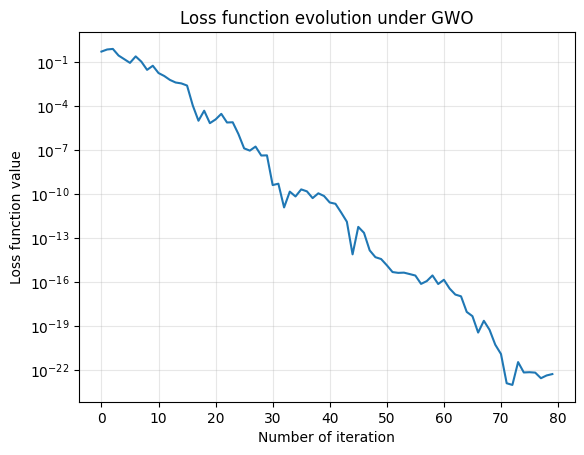

In [10]:
plt.semilogy(Loss_function[:80])
plt.ylabel('Loss function value')
plt.xlabel('Number of iteration')
plt.title('Loss function evolution under GWO')
plt.grid(alpha=0.3)

In [11]:
Loss_function[-1]

tensor(0.)

In [12]:
agents

tensor([[-6.9396e-27,  6.1489e-25],
        [-6.9379e-27,  6.1497e-25],
        [-6.9414e-27,  6.1501e-25],
        [-6.9376e-27,  6.1509e-25],
        [-6.9413e-27,  6.1495e-25],
        [-6.9394e-27,  6.1495e-25]])